ERROR: Error in brewer.pal(40, "set1", "set2", "Spectral", "Dark2"): unused arguments ("set2", "Spectral", "Dark2")


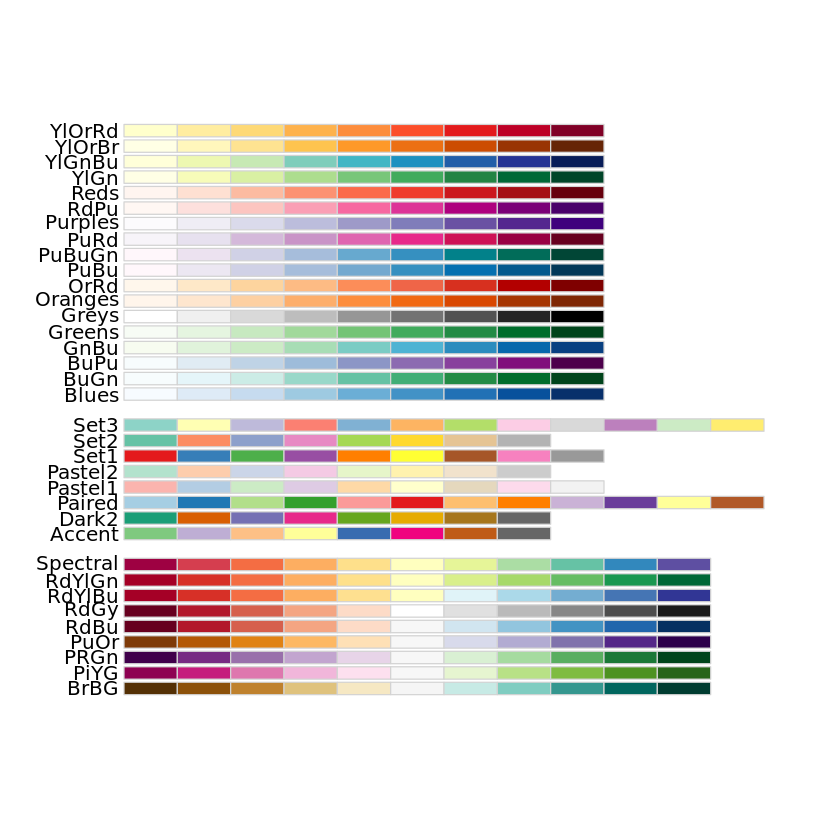

In [14]:
#!conda install -c conda-forge r-factominer
#!conda install -c conda-forge r-missmda
#!conda install -c conda-forge r-factoextra

#call library
library("missMDA")
library("FactoMineR")
library("factoextra")
library (RColorBrewer) #belum perlu
display.brewer.all()
getPalette <- colorRampPalette(brewer.pal(40, "set1", "set2", "Spectral", "Dark2"))

In [2]:
RawData <- read.table("../data/atlbf.csv",sep = ",",header=FALSE)
datlbf <- data.frame(read.csv("../data/atlbf.csv")[,c(1:37)])
datlbf

ID,cwInvleaves,cytInvleaves,vacInvleaves,FKleaves,HXKleaves,PGIleaves,PFKleaves,Aldolaseleaves,AGPaseleaves,⋯,vacInvflowers,Fkflowers,HXKflowers,PGIflowers,PFKflowers,Aldolaseflowers,AGPaseflowers,PGMflowers,UGPaseflowers,G6PDHflowers
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CVI,56.00,585.16,720.72,0.20,0.21,1.30,NA,0.26,2.20,⋯,1114.12,0.21,0.12,27.49,0.02,0.21,3.60,0.82,3.94,NA
B244,NA,NA,105.70,0.67,NA,NA,NA,1.17,NA,⋯,1506.09,9.27,NA,31.94,NA,22.79,3.15,NA,NA,NA
C24,28.19,108.99,109.73,0.16,0.08,NA,NA,5.18,0.74,⋯,575.62,0.43,0.21,34.52,0.08,0.26,NA,0.97,6.06,0.46
R16,1.54,NA,447.97,0.17,0.10,10.16,0.64,0.01,0.63,⋯,1460.63,0.86,0.13,28.87,1.64,0.07,2.71,24.82,6.03,3.50
B149,3.91,NA,499.35,0.21,0.11,10.73,1.19,0.16,0.82,⋯,2346.43,0.71,0.20,32.47,1.46,0.96,2.08,16.77,5.84,2.49
COL0,50.14,289.71,327.48,0.39,0.20,0.95,0.24,7.37,4.02,⋯,80.54,0.58,0.35,NA,0.14,0.26,12.39,3.84,9.90,0.95
B351,2.57,NA,624.10,0.15,0.07,14.62,0.70,0.77,0.97,⋯,4102.72,1.13,0.26,52.76,4.29,1.10,4.41,33.16,10.57,4.73
B257,30.05,NA,45.23,0.05,0.05,0.38,0.03,0.12,NA,⋯,279.10,1.42,0.14,14.58,0.36,2.95,2.54,1.50,0.25,0.52
B102,13.07,NA,23.66,0.15,NA,0.03,NA,1.54,0.09,⋯,710.62,1.11,NA,0.19,NA,0.73,1.78,0.74,NA,0.21


In [3]:
# handling missing data
# check missing values
is.na(datlbf)
sum(is.na(datlbf))
colSums(is.na(datlbf))

ID,cwInvleaves,cytInvleaves,vacInvleaves,FKleaves,HXKleaves,PGIleaves,PFKleaves,Aldolaseleaves,AGPaseleaves,⋯,vacInvflowers,Fkflowers,HXKflowers,PGIflowers,PFKflowers,Aldolaseflowers,AGPaseflowers,PGMflowers,UGPaseflowers,G6PDHflowers
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,⋯,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE
FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE


[1] 366

ID     cwInvleaves    cytInvleaves    vacInvleaves        FKleaves 
              0               9              27               0               4 
      HXKleaves       PGIleaves       PFKleaves  Aldolaseleaves    AGPaseleaves 
              7              12              14               2              14 
      PGMleaves   UGPasePleaves     G6PDHleaves       cwInvbuds      cytInvbuds 
             11               8              14               9              23 
     vacInvbuds          Fkbuds         HXKbuds         PGIbuds         PFKbuds 
              0               0               7              10              16 
   Aldolasebuds      AGPasebuds         PGMbuds      UGPasebuds       G6PDHbuds 
              1               8              14              15              12 
   cwInvflowers   cytInvflowers   vacInvflowers       Fkflowers      HXKflowers 
              9              23               0               4               9 
     PGIflowers      PFKflowers Aldolaseflowers   AGPaseflowers      PGMflowers 
              9              18               5               9              16 
  UGPaseflowers    G6PDHflowers 
             16              11

In [4]:
# correct missing values (imputation)
datlbf.mda <- datlbf[, c(2:37)]     # removing string + categorical data. we want numeric ONLY
datlbf.est <- estim_ncpPCA(datlbf.mda, ncp.min = 0, ncp.max = 5, method.cv = "Kfold")
datlbf.imp <- imputePCA(datlbf.mda, ncp = 2)

datlbf.imp$completeObs

  |======================================================================| 100%


cwInvleaves,cytInvleaves,vacInvleaves,FKleaves,HXKleaves,PGIleaves,PFKleaves,Aldolaseleaves,AGPaseleaves,PGMleaves,⋯,vacInvflowers,Fkflowers,HXKflowers,PGIflowers,PFKflowers,Aldolaseflowers,AGPaseflowers,PGMflowers,UGPaseflowers,G6PDHflowers
56.00000,585.160000,720.72,0.2000000,0.21000000,1.30000000,0.337757705,0.2600000,2.200000,0.16000000,⋯,1114.12,0.2100000,0.12000000,27.490000,0.02000000,0.210000,3.600000,0.8200000,3.940000,1.5363278
164.31287,-133.193492,105.70,0.6700000,0.08739833,2.19868874,-0.184035994,1.1700000,3.599134,1.81158523,⋯,1506.09,9.2700000,2.33716704,31.940000,3.47556128,22.790000,3.150000,7.4656996,45.876870,1.9399237
28.19000,108.990000,109.73,0.1600000,0.08000000,1.61056258,0.175275959,5.1800000,0.740000,0.30000000,⋯,575.62,0.4300000,0.21000000,34.520000,0.08000000,0.260000,4.134227,0.9700000,6.060000,0.4600000
1.54000,464.814308,447.97,0.1700000,0.10000000,10.16000000,0.640000000,0.0100000,0.630000,8.32000000,⋯,1460.63,0.8600000,0.13000000,28.870000,1.64000000,0.070000,2.710000,24.8200000,6.030000,3.5000000
3.91000,469.009856,499.35,0.2100000,0.11000000,10.73000000,1.190000000,0.1600000,0.820000,7.41000000,⋯,2346.43,0.7100000,0.20000000,32.470000,1.46000000,0.960000,2.080000,16.7700000,5.840000,2.4900000
50.14000,289.710000,327.48,0.3900000,0.20000000,0.95000000,0.240000000,7.3700000,4.020000,0.65000000,⋯,80.54,0.5800000,0.35000000,17.499489,0.14000000,0.260000,12.390000,3.8400000,9.900000,0.9500000
2.57000,665.644653,624.10,0.1500000,0.07000000,14.62000000,0.700000000,0.7700000,0.970000,10.17000000,⋯,4102.72,1.1300000,0.26000000,52.760000,4.29000000,1.100000,4.410000,33.1600000,10.570000,4.7300000
30.05000,94.039519,45.23,0.0500000,0.05000000,0.38000000,0.030000000,0.1200000,1.536862,0.07000000,⋯,279.10,1.4200000,0.14000000,14.580000,0.36000000,2.950000,2.540000,1.5000000,0.250000,0.5200000
13.07000,125.621873,23.66,0.1500000,0.07903568,0.03000000,0.032635553,1.5400000,0.090000,0.06000000,⋯,710.62,1.1100000,-0.04690006,0.190000,0.03557601,0.730000,1.780000,0.7400000,4.482901,0.2100000
46.57000,116.553257,46.19,0.2499366,0.10000000,0.17748969,0.060000000,0.9600000,0.210000,-0.09675763,⋯,684.33,1.4700000,0.34000000,28.830000,0.82000000,2.100000,0.590000,1.0843747,4.660000,0.6800000


In [5]:
# new data without NA has to be the same with original, DATALBF.IMP no data reduction
sum(is.na(datlbf.imp))     # recheck NA data

datlbf.row <- cbind(datlbf[,c(1)], #add col 1,2 and 9 from "dat". WITH CVI. I believe this is the correct one
                    as.data.frame(datlbf.imp$completeObs[,]))

#both of them will produce different pattern of correaltion matrix *)
datlbf.row#to see the stucture of coloumn and row

#*) both of command below will produce different pattern of correlation matrix
datlbf.comp <- data.frame(datlbf.row, row.names = paste0(read.csv("../data/at.csv")[,1,1:41])) #WITH CVI
datlbf.comp

[1] 0

"datlbf[, c(1)]",cwInvleaves,cytInvleaves,vacInvleaves,FKleaves,HXKleaves,PGIleaves,PFKleaves,Aldolaseleaves,AGPaseleaves,⋯,vacInvflowers,Fkflowers,HXKflowers,PGIflowers,PFKflowers,Aldolaseflowers,AGPaseflowers,PGMflowers,UGPaseflowers,G6PDHflowers
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CVI,56.00000,585.160000,720.72,0.2000000,0.21000000,1.30000000,0.337757705,0.2600000,2.200000,⋯,1114.12,0.2100000,0.12000000,27.490000,0.02000000,0.210000,3.600000,0.8200000,3.940000,1.5363278
B244,164.31287,-133.193492,105.70,0.6700000,0.08739833,2.19868874,-0.184035994,1.1700000,3.599134,⋯,1506.09,9.2700000,2.33716704,31.940000,3.47556128,22.790000,3.150000,7.4656996,45.876870,1.9399237
C24,28.19000,108.990000,109.73,0.1600000,0.08000000,1.61056258,0.175275959,5.1800000,0.740000,⋯,575.62,0.4300000,0.21000000,34.520000,0.08000000,0.260000,4.134227,0.9700000,6.060000,0.4600000
R16,1.54000,464.814308,447.97,0.1700000,0.10000000,10.16000000,0.640000000,0.0100000,0.630000,⋯,1460.63,0.8600000,0.13000000,28.870000,1.64000000,0.070000,2.710000,24.8200000,6.030000,3.5000000
B149,3.91000,469.009856,499.35,0.2100000,0.11000000,10.73000000,1.190000000,0.1600000,0.820000,⋯,2346.43,0.7100000,0.20000000,32.470000,1.46000000,0.960000,2.080000,16.7700000,5.840000,2.4900000
COL0,50.14000,289.710000,327.48,0.3900000,0.20000000,0.95000000,0.240000000,7.3700000,4.020000,⋯,80.54,0.5800000,0.35000000,17.499489,0.14000000,0.260000,12.390000,3.8400000,9.900000,0.9500000
B351,2.57000,665.644653,624.10,0.1500000,0.07000000,14.62000000,0.700000000,0.7700000,0.970000,⋯,4102.72,1.1300000,0.26000000,52.760000,4.29000000,1.100000,4.410000,33.1600000,10.570000,4.7300000
B257,30.05000,94.039519,45.23,0.0500000,0.05000000,0.38000000,0.030000000,0.1200000,1.536862,⋯,279.10,1.4200000,0.14000000,14.580000,0.36000000,2.950000,2.540000,1.5000000,0.250000,0.5200000
B102,13.07000,125.621873,23.66,0.1500000,0.07903568,0.03000000,0.032635553,1.5400000,0.090000,⋯,710.62,1.1100000,-0.04690006,0.190000,0.03557601,0.730000,1.780000,0.7400000,4.482901,0.2100000


,datlbf...c.1..,cwInvleaves,cytInvleaves,vacInvleaves,FKleaves,HXKleaves,PGIleaves,PFKleaves,Aldolaseleaves,AGPaseleaves,⋯,vacInvflowers,Fkflowers,HXKflowers,PGIflowers,PFKflowers,Aldolaseflowers,AGPaseflowers,PGMflowers,UGPaseflowers,G6PDHflowers
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CVI,CVI,56.00000,585.160000,720.72,0.2000000,0.21000000,1.30000000,0.337757705,0.2600000,2.200000,⋯,1114.12,0.2100000,0.12000000,27.490000,0.02000000,0.210000,3.600000,0.8200000,3.940000,1.5363278
B244,B244,164.31287,-133.193492,105.70,0.6700000,0.08739833,2.19868874,-0.184035994,1.1700000,3.599134,⋯,1506.09,9.2700000,2.33716704,31.940000,3.47556128,22.790000,3.150000,7.4656996,45.876870,1.9399237
C24,C24,28.19000,108.990000,109.73,0.1600000,0.08000000,1.61056258,0.175275959,5.1800000,0.740000,⋯,575.62,0.4300000,0.21000000,34.520000,0.08000000,0.260000,4.134227,0.9700000,6.060000,0.4600000
R16,R16,1.54000,464.814308,447.97,0.1700000,0.10000000,10.16000000,0.640000000,0.0100000,0.630000,⋯,1460.63,0.8600000,0.13000000,28.870000,1.64000000,0.070000,2.710000,24.8200000,6.030000,3.5000000
B149,B149,3.91000,469.009856,499.35,0.2100000,0.11000000,10.73000000,1.190000000,0.1600000,0.820000,⋯,2346.43,0.7100000,0.20000000,32.470000,1.46000000,0.960000,2.080000,16.7700000,5.840000,2.4900000
COL0,COL0,50.14000,289.710000,327.48,0.3900000,0.20000000,0.95000000,0.240000000,7.3700000,4.020000,⋯,80.54,0.5800000,0.35000000,17.499489,0.14000000,0.260000,12.390000,3.8400000,9.900000,0.9500000
B351,B351,2.57000,665.644653,624.10,0.1500000,0.07000000,14.62000000,0.700000000,0.7700000,0.970000,⋯,4102.72,1.1300000,0.26000000,52.760000,4.29000000,1.100000,4.410000,33.1600000,10.570000,4.7300000
B257,B257,30.05000,94.039519,45.23,0.0500000,0.05000000,0.38000000,0.030000000,0.1200000,1.536862,⋯,279.10,1.4200000,0.14000000,14.580000,0.36000000,2.950000,2.540000,1.5000000,0.250000,0.5200000
B102,B102,13.07000,125.621873,23.66,0.1500000,0.07903568,0.03000000,0.032635553,1.5400000,0.090000,⋯,710.62,1.1100000,-0.04690006,0.190000,0.03557601,0.730000,1.780000,0.7400000,4.482901,0.2100000


In [11]:
#PCA 

#datlbf.comp
pca.enzrob <- PCA(datlbf.comp[,2:37], graph = F) # ID data
print(pca.enzrob)
eigect_enzrob <- get_eigenvalue(pca.enzrob)                     # eigen value

# print to excel #if need, run this
write.csv(eigect_enzrob, "../table/eigect_enzrob.csv", row.names=T)

## Scree plot
sp.enzrob <- fviz_eig(pca.enzrob, addlabels = TRUE, ylim = c(0, 60))

## Extracting data
var.enzrob<- get_pca_var(pca.enzrob)
#var.enzrob                #if you wanna see
head(var.enzrob$coord)         # Coordinates
head(var.enzrob$cos2)          # Cos2: quality on the factore map
head(var.enzrob$contrib)       # Contributions to the principal components

# print to excel, #optional
contri_pcEnzrob <- head(var.enzrob$contrib)
write.csv(contri_pcEnzrob, "../table/contri_pcEnzrob.csv", row.names=T)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 41 individuals, described by 36 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
cwInvleaves,0.7987639,0.2119574,0.21100106,0.14847113,0.02116184
cytInvleaves,-0.8960443,0.3058457,0.09930761,0.05896896,-0.18264538
vacInvleaves,-0.6064066,0.5612453,0.14630336,0.12681263,-0.05883207
FKleaves,0.6925188,0.3069402,0.07975385,0.08626596,-0.09803913
HXKleaves,-0.1239126,0.1387652,0.59911729,-0.24019467,-0.51002194
PGIleaves,-0.5900679,0.6554222,-0.14563841,0.24160506,0.05929665


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
cwInvleaves,0.63802379,0.04492595,0.044521446,0.022043675,0.0004478233
cytInvleaves,0.80289534,0.09354158,0.009862000,0.003477339,0.0333593358
vacInvleaves,0.36772892,0.31499624,0.021404672,0.016081442,0.0034612123
FKleaves,0.47958222,0.09421227,0.006360676,0.007441815,0.0096116710
HXKleaves,0.01535433,0.01925578,0.358941527,0.057693479,0.2601223834
PGIleaves,0.34818012,0.42957825,0.021210546,0.058373006,0.0035160930


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
cwInvleaves,4.8061462,0.4972619,1.5193795,1.2007479,0.02892987
cytInvleaves,6.0481011,1.0353630,0.3365596,0.1894152,2.15504908
vacInvleaves,2.7700518,3.4865289,0.7304754,0.8759772,0.22359805
FKleaves,3.6126274,1.0427864,0.2170702,0.4053654,0.62092432
HXKleaves,0.1156621,0.2131322,12.2495660,3.1426394,16.80418657
PGIleaves,2.6227934,4.7547773,0.7238504,3.1796542,0.22714340


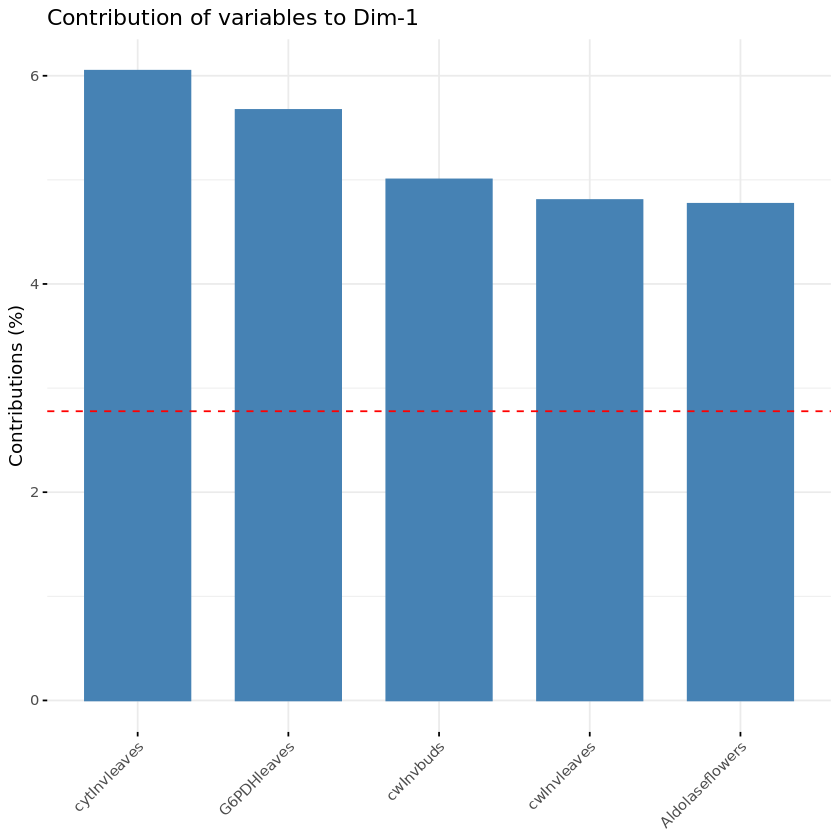

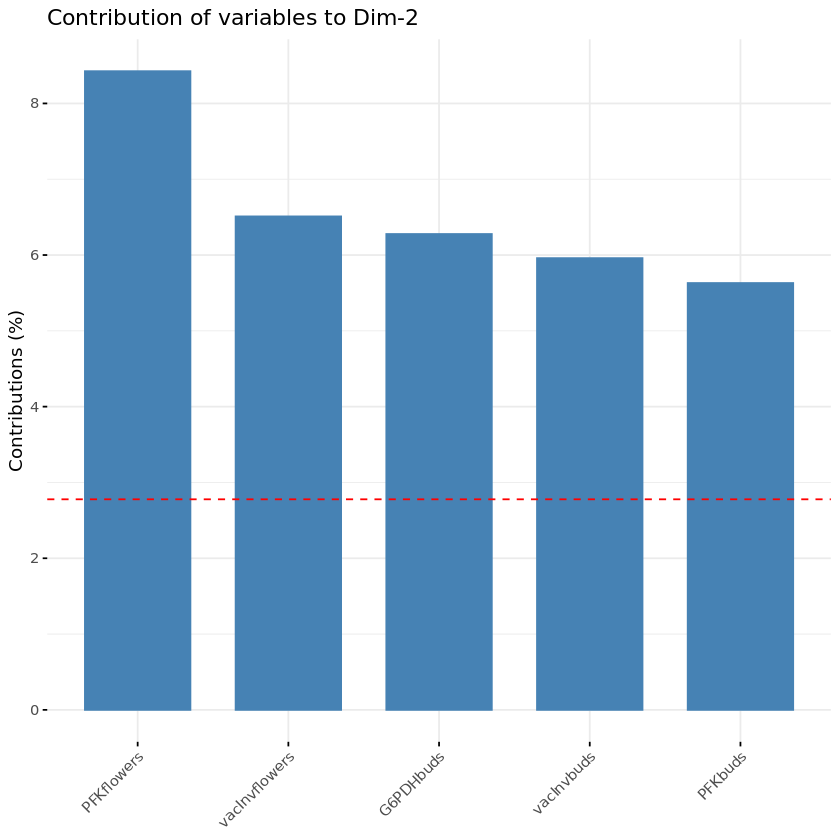

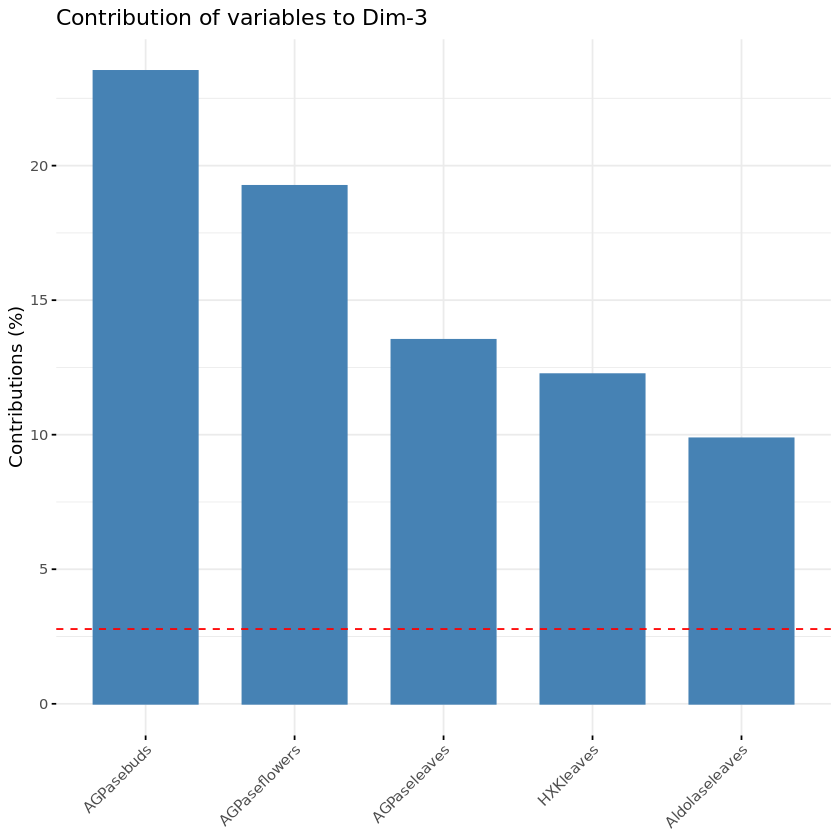

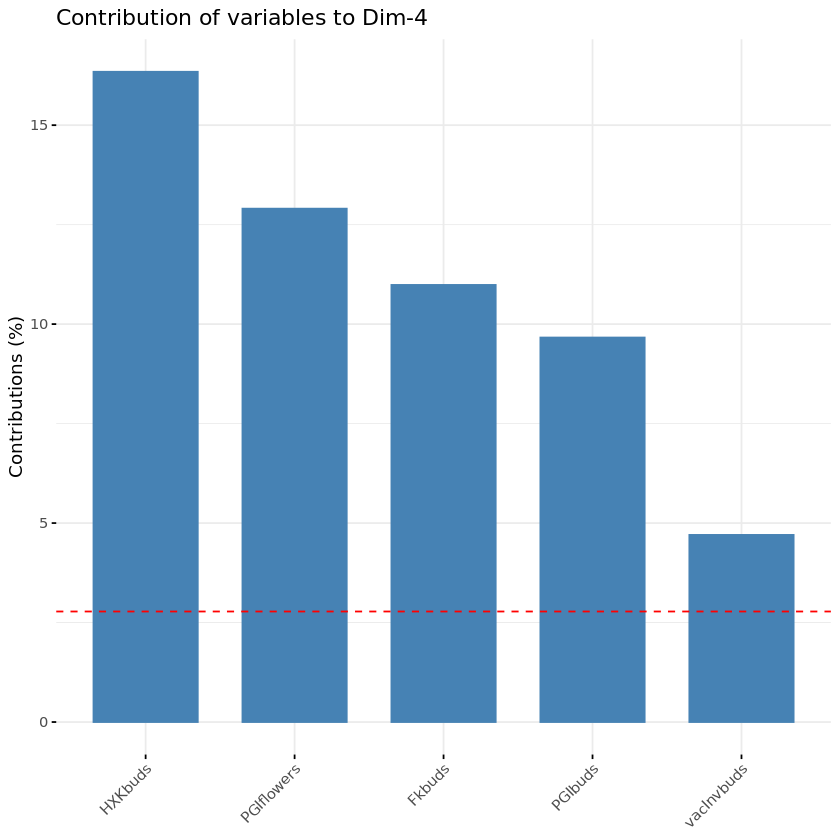

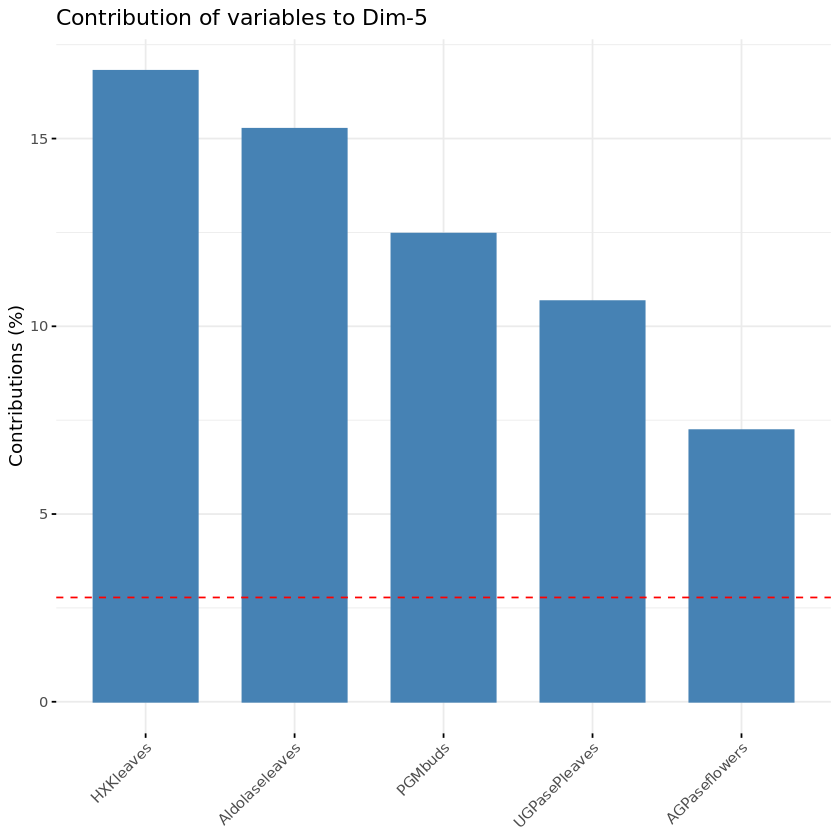

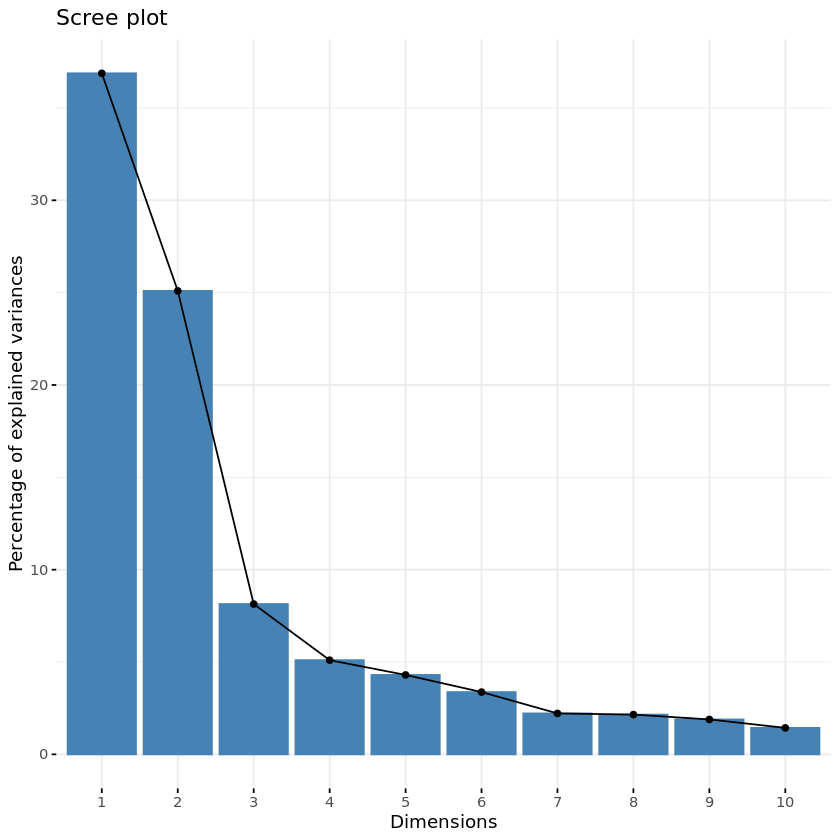

In [13]:
## Plotting

### Contributions of variables to PC1 to PC5
fviz_contrib(pca.enzrob, choice = "var", axes = 1, top = 5)
fviz_contrib(pca.enzrob, choice = "var", axes = 2, top = 5)
fviz_contrib(pca.enzrob, choice = "var", axes = 3, top = 5)
fviz_contrib(pca.enzrob, choice = "var", axes = 4, top = 5)
fviz_contrib(pca.enzrob, choice = "var", axes = 5, top = 5)                    

#Visualize eigenvalues (scree plot). (all in one graph, 10 dimension)
fviz_eig(pca.enzrob)



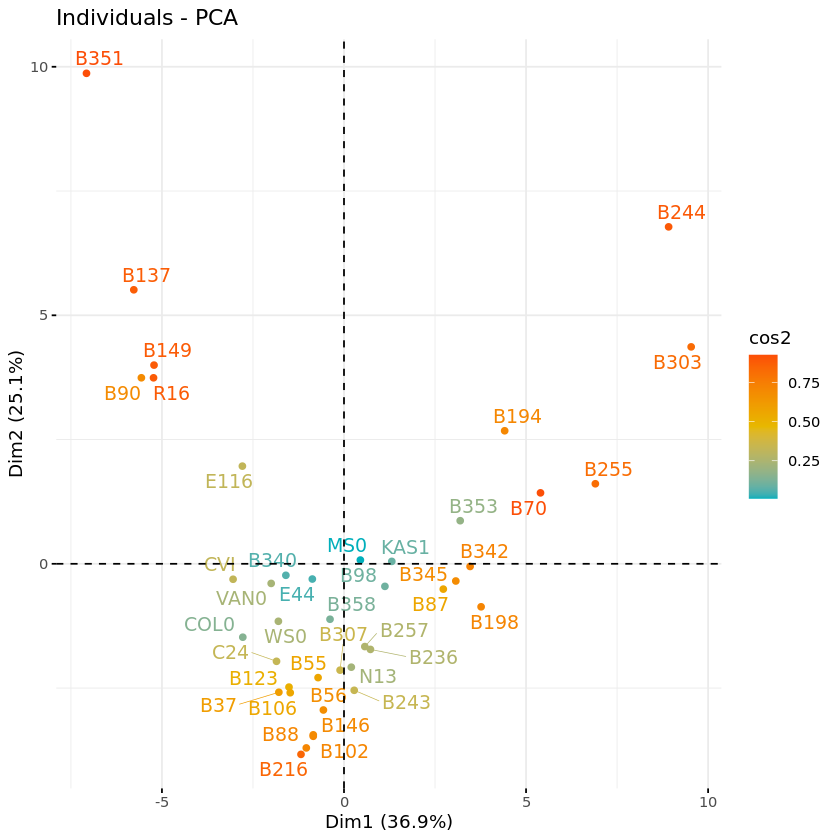

In [24]:
#Graph of individuals. Individuals with a similar profile are grouped together.
fviz_pca_ind(pca.enzrob,
             col.ind = "cos2", # Color by the quality of representation
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

Warning message:
“ggrepel: 14 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


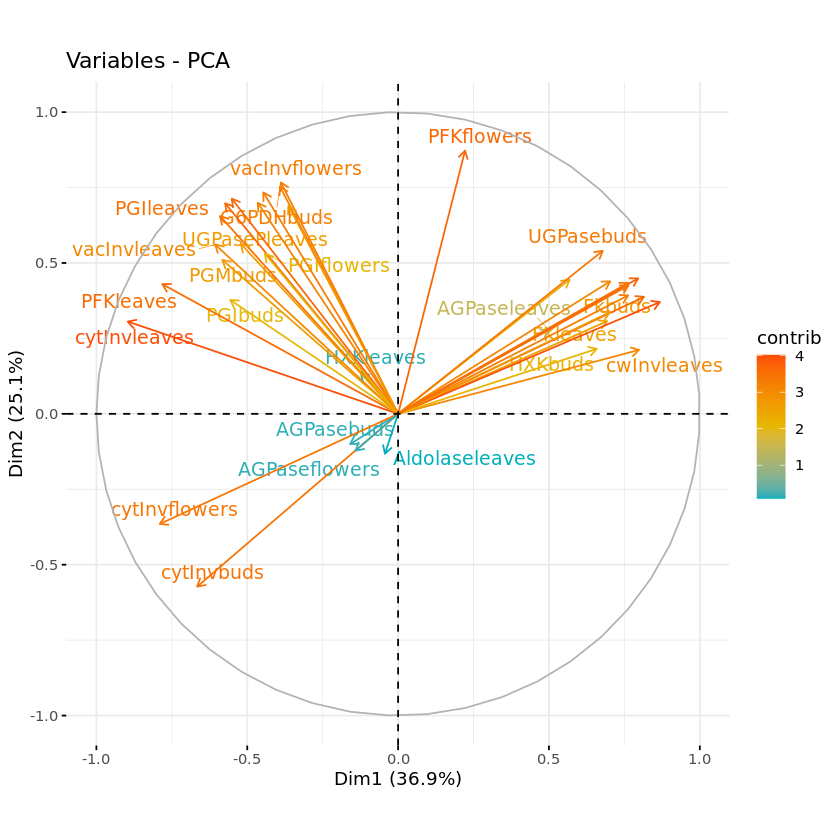

In [26]:
#Graph of variables. Positive correlated variables point to the same side of the plot. Negative correlated variables point to opposite sides of the graph.

fviz_pca_var(pca.enzrob,
             col.var = "contrib", # Color by contributions to the PC
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE     # Avoid text overlapping
)

Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


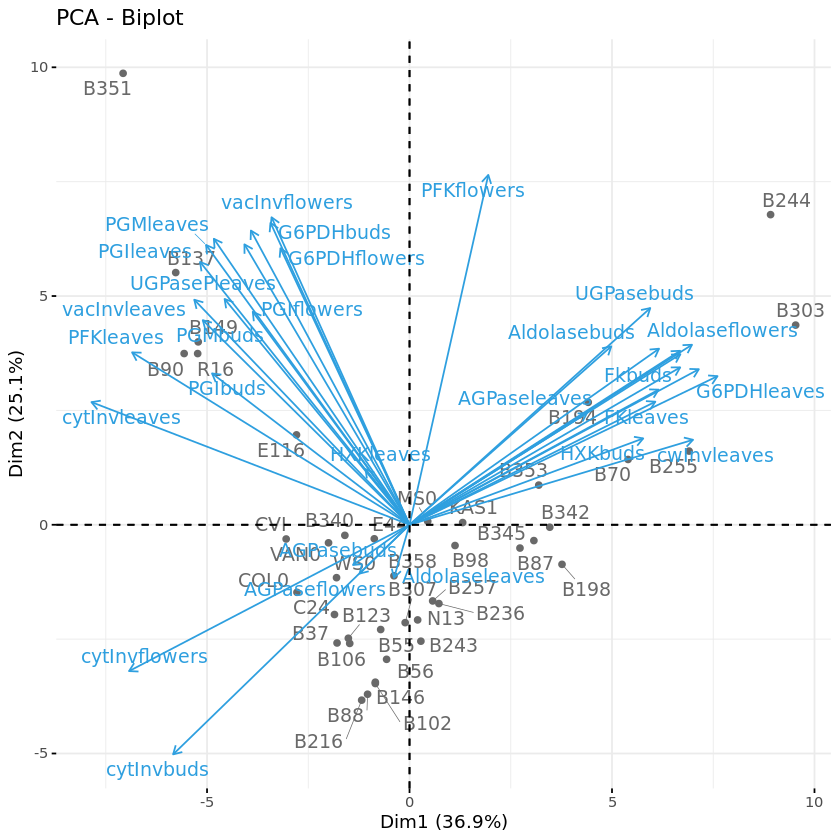

In [27]:
#Biplot of individuals and variables
fviz_pca_biplot(pca.enzrob, repel = TRUE,
                col.var = "#2E9FDF", # Variables color
                col.ind = "#696969"  # Individuals color
)

In [33]:
pca.enzrob

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 41 individuals, described by 36 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

Warning message:
“ggrepel: 12 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


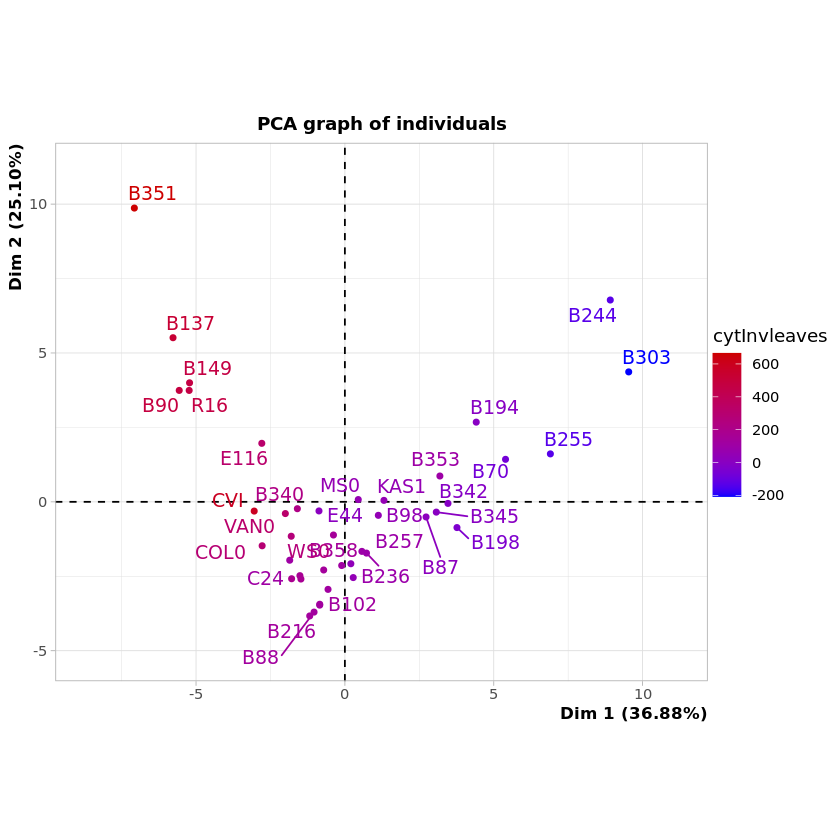

In [47]:
plot.PCA(pca.enzrob, axes=c(1, 2), choix="ind", habillage=2)

In [52]:
write.csv(pca.enzrob$ind$coord, "../table/PCAindcoord.csv")

In [57]:
pca.enzrob$ind$coord[, 'Dim.1']

CVI       B244        C24        R16       B149       COL0       B351 
-3.0461381  8.9158871 -1.8531805 -5.2310746 -5.2176420 -2.7793450 -7.0725047 
      B257       B102       B307       B236        B70        B90       B342 
 0.5719575 -0.8449254 -0.1072797  0.7258758  5.3968611 -5.5648981  3.4631665 
      B340       VAN0        B98       B243       B137        B88        B55 
-1.5965435 -1.9997926  1.1237929  0.2805989 -5.7731548 -1.0355251 -0.7118007 
       B56        B87       KAS1       B353        B37       B123       B146 
-0.5657927  2.7273440  1.3125135  3.1916384 -1.7892330 -1.5104816 -0.8442249 
      B216       B106       B358       B345       B198       B194       B303 
-1.1812019 -1.4765649 -0.3838733  3.0708644  3.7656354  4.4128988  9.5349713 
       WS0       B255        MS0        N13       E116        E44 
-1.8019703  6.9033880  0.4495452  0.2008136 -2.7908008 -0.8698043

CVI B244  C24  R16 B149 COL0 B351 B257 B102 B307 B236  B70  B90 B342 B340 VAN0 
   3    1    3    2    2    3    2    3    3    3    3    1    2    3    3    3 
 B98 B243 B137  B88  B55  B56  B87 KAS1 B353  B37 B123 B146 B216 B106 B358 B345 
   3    3    2    3    3    3    3    3    3    3    3    3    3    3    3    3 
B198 B194 B303  WS0 B255  MS0  N13 E116  E44 
   3    1    1    3    1    3    3    2    3

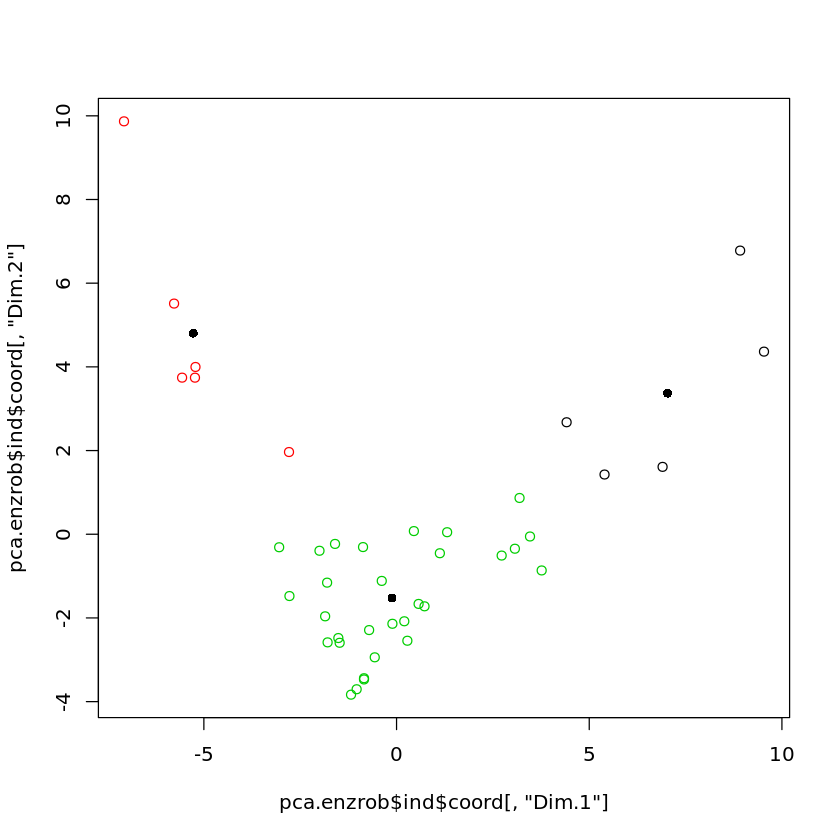

In [60]:
X <- cbind(pca.enzrob$ind$coord[, 'Dim.1'], pca.enzrob$ind$coord[, 'Dim.2'])
cl <- kmeans(X,3)
cl$cluster
plot(pca.enzrob$ind$coord[, 'Dim.1'], pca.enzrob$ind$coord[, 'Dim.2'],col=cl$cluster)
points(cl$centers, pch=16)

In [62]:
# 1. Open jpeg file
jpeg("../images/rplot.jpg")
# 2. Create the plot
plot(pca.enzrob$ind$coord[, 'Dim.1'], pca.enzrob$ind$coord[, 'Dim.2'],col=cl$cluster)
# 3. Close the file
dev.off()

png 
  2